# AQUA ALERT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
#Loading the dataset
df = pd.read_csv('one_data.csv')

In [4]:
df.head()

,OFFCHIP_PLATINUM_78kHz_RESISTANCE,OFFCHIP_GOLD_78kHz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_CAPACITANCE,OFFCHIP_GOLD_200Hz_RESISTANCE,OFFCHIP_GOLD_200Hz_CAPACITANCE,OFFCHIP_COPPER_200Hz_RESISTANCE,OFFCHIP_COPPER_200Hz_CAPACITANCE,OFFCHIP_SILVER_200Hz_RESISTANCE,OFFCHIP_SILVER_200Hz_CAPACITANCE,OFFCHIP_NICKEL_200Hz_RESISTANCE,OFFCHIP_NICKEL_200Hz_CAPACITANCE,CLASS
0,2292.000,13980.000,1206.0000,-523.000,4698.000,-3925.0000,6757.0000,-3263.0000,11269.000,-3596.000,14611.000,-1492.000,10
1,2292.010,13980.007,1206.0200,-522.997,4697.983,-3925.0250,6757.0510,-3263.0340,11269.020,-3595.984,14611.002,-1492.000,10
2,2292.015,13980.014,1206.0400,-522.991,4697.965,-3925.0679,6757.0890,-3263.1040,11269.038,-3595.973,14611.001,-1492.000,10
3,2292.023,13980.020,1206.0599,-522.994,4697.960,-3925.1118,6757.1597,-3263.1820,11269.067,-3595.987,14611.004,-1492.005,10
4,2292.029,13980.027,1206.0889,-522.986,4697.949,-3925.1687,6757.3160,-3263.2507,11269.092,-3595.981,14611.006,-1492.003,10


## Maximum and Minimum Readings of each feature

|Features | Max Reading | Min Reading |
|-------- | ------------|-------------|
|OFFCHIP_PLATINUM_78kHz_RESISTANCE| 26481 | -1.0|
|OFFCHIP_GOLD_78kHz_RESISTANCE|16741.0|-1.0|
|OFFCHIP_PLATINUM_200Hz_RESISTANCE|23622.0|-1.0|
|OFFCHIP_PLATINUM_200Hz_CAPACITANCE|-1.0|-11164.0|
|OFFCHIP_GOLD_200Hz_RESISTANCE|16396.0|-1.0|
|OFFCHIP_GOLD_200Hz_CAPACITANCE|-1.0|-16038.0|
|OFFCHIP_COPPER_200Hz_RESISTANCE|23204.0|-1.0|
|OFFCHIP_COPPER_200Hz_CAPACITANCE|-1.0|-17063.0|
|OFFCHIP_SILVER_200Hz_RESISTANCE|24251.0|-1.0|
|OFFCHIP_SILVER_200Hz_CAPACITANCE|-1.0|-9495.0|
|OFFCHIP_NICKEL_200Hz_RESISTANCE|17353.0|-1.0|
|OFFCHIP_NICKEL_200Hz_CAPACITANCE|-1.0|-5266.0|

In [5]:
# Checking the shape of the dataset
df.shape

(158400, 13)

In [6]:
# Checking for null/missing values
df.isnull().sum()

OFFCHIP_PLATINUM_78kHz_RESISTANCE     0
OFFCHIP_GOLD_78kHz_RESISTANCE         0
OFFCHIP_PLATINUM_200Hz_RESISTANCE     0
OFFCHIP_PLATINUM_200Hz_CAPACITANCE    0
OFFCHIP_GOLD_200Hz_RESISTANCE         0
OFFCHIP_GOLD_200Hz_CAPACITANCE        0
OFFCHIP_COPPER_200Hz_RESISTANCE       0
OFFCHIP_COPPER_200Hz_CAPACITANCE      0
OFFCHIP_SILVER_200Hz_RESISTANCE       0
OFFCHIP_SILVER_200Hz_CAPACITANCE      0
OFFCHIP_NICKEL_200Hz_RESISTANCE       0
OFFCHIP_NICKEL_200Hz_CAPACITANCE      0
CLASS                                 0
dtype: int64

In [7]:
#Checking the data types of the columns
df.dtypes

OFFCHIP_PLATINUM_78kHz_RESISTANCE     float64
OFFCHIP_GOLD_78kHz_RESISTANCE         float64
OFFCHIP_PLATINUM_200Hz_RESISTANCE     float64
OFFCHIP_PLATINUM_200Hz_CAPACITANCE    float64
OFFCHIP_GOLD_200Hz_RESISTANCE         float64
OFFCHIP_GOLD_200Hz_CAPACITANCE        float64
OFFCHIP_COPPER_200Hz_RESISTANCE       float64
OFFCHIP_COPPER_200Hz_CAPACITANCE      float64
OFFCHIP_SILVER_200Hz_RESISTANCE       float64
OFFCHIP_SILVER_200Hz_CAPACITANCE      float64
OFFCHIP_NICKEL_200Hz_RESISTANCE       float64
OFFCHIP_NICKEL_200Hz_CAPACITANCE      float64
CLASS                                   int64
dtype: object

In [8]:
# describing the dataframe
df.describe()

,OFFCHIP_PLATINUM_78kHz_RESISTANCE,OFFCHIP_GOLD_78kHz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_CAPACITANCE,OFFCHIP_GOLD_200Hz_RESISTANCE,OFFCHIP_GOLD_200Hz_CAPACITANCE,OFFCHIP_COPPER_200Hz_RESISTANCE,OFFCHIP_COPPER_200Hz_CAPACITANCE,OFFCHIP_SILVER_200Hz_RESISTANCE,OFFCHIP_SILVER_200Hz_CAPACITANCE,OFFCHIP_NICKEL_200Hz_RESISTANCE,OFFCHIP_NICKEL_200Hz_CAPACITANCE,CLASS
count,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000
mean,2576.209259,13127.255757,10064.665571,-4735.790962,6764.233199,-4225.721826,8309.397854,-2962.525442,9309.499310,-2444.917863,11733.212197,-2187.960495,6.875000
std,3548.988581,2294.100282,7056.864729,3344.504490,3623.041142,3146.082729,4986.671428,2267.912571,4129.482927,931.063091,3890.389500,1177.070614,3.479864
min,-1.000000,-1.000000,-1.000000,-11164.000000,-1.000000,-16038.000000,-1.000000,-17063.000000,-1.000000,-9495.000000,-1.000000,-5266.000000,0.000000
25%,1187.000000,11705.000000,1757.750000,-7498.000000,3963.000000,-5073.000000,4337.000000,-3466.000000,5914.000000,-2875.000000,9195.000000,-2708.000000,4.000000
50%,1396.000000,12726.000000,10351.000000,-5042.000000,6920.000000,-3023.000000,7683.000000,-2503.000000,8759.000000,-2347.000000,11863.000000,-1886.000000,8.000000
75%,3052.000000,15772.000000,15843.000000,-1000.000000,9207.000000,-2265.000000,12981.000000,-1659.000000,13253.000000,-1910.000000,15738.000000,-1362.000000,10.000000
max,26481.000000,16741.000000,23622.000000,-1.000000,16396.000000,-1.000000,23204.000000,-1.000000,24251.000000,-1.000000,17353.000000,-1.000000,10.000000


# Exploratory Data Analysis

With the help beautiful graphs, We are going to visualize the dataset to get better understanding about
the data and features of the dataset.

## Classes Distribution in the Dataset

There are 9000 sets for each class except class 10 which is wastewater. It has 68, 400 datasets. 

Text(0, 0.5, 'Count')

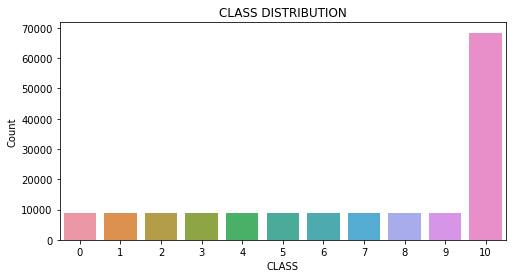

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x=df.CLASS,)
plt.title('CLASS DISTRIBUTION')
plt.xlabel('CLASS')
plt.ylabel('Count')

Text(0.5, 1.0, 'Weightage of different classes in the dataset')

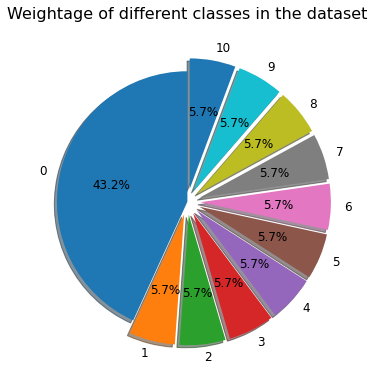

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

# numbers = {0: 9000, 1: 9000, 2: 9000, 3: 9000, 4: 9000, 5: 9000, 6: 9000, 7: 9000, 8: 9000, 9: 9000, 10: 68400}

myexplode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 , 0.1, 0.1, 0.1]
ax.pie(x=df.CLASS.value_counts(), labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], autopct='%1.1f%%', startangle=90,
      textprops={'fontsize':12}, shadow=True, explode=myexplode)

# title
ax.set_title("Weightage of different classes in the dataset", fontdict={"fontsize":16}, pad=20)

### Correlation Matrix

We are going to see which features are correlated to each other. In other words, we can find out that the outcome mostly depends on which features.

<AxesSubplot:>

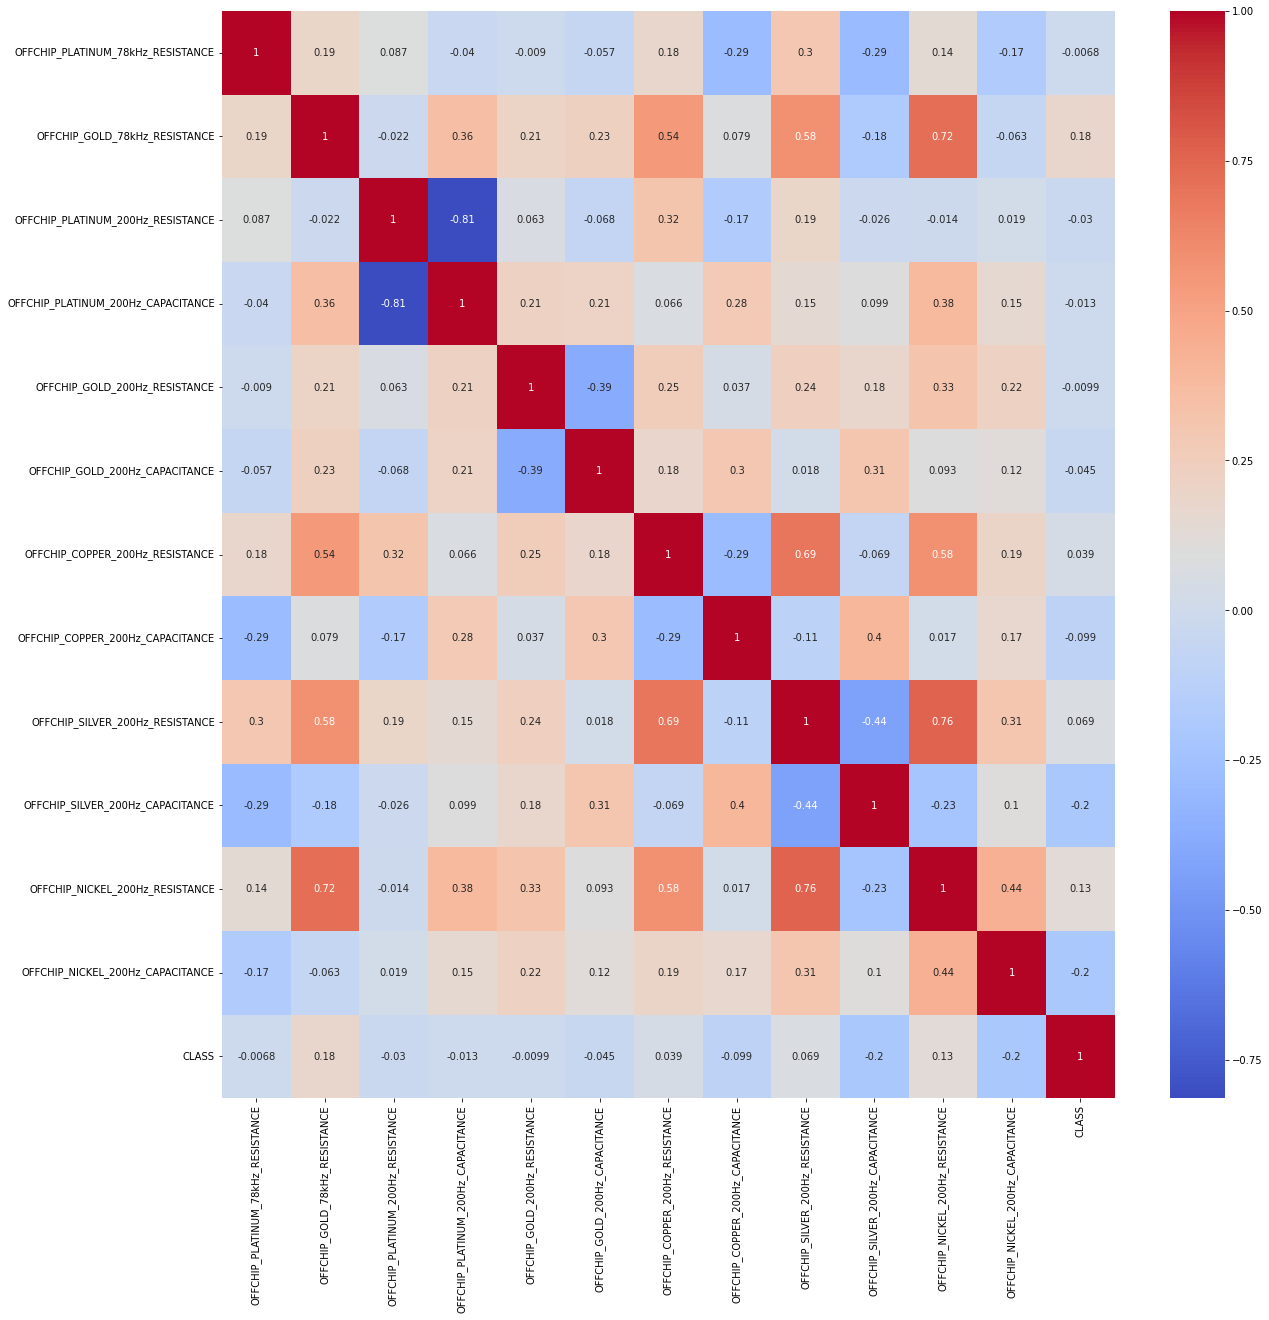

In [11]:
#plotting the coorelation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

There is no major correlation found among the features. So, the outcome won't dependent on one or two features.

### Reading's Count of Some Important Features

Here, we are plotting some important feature's reading count. Features are selected on the basis of correlation with the **CLASS** feature.

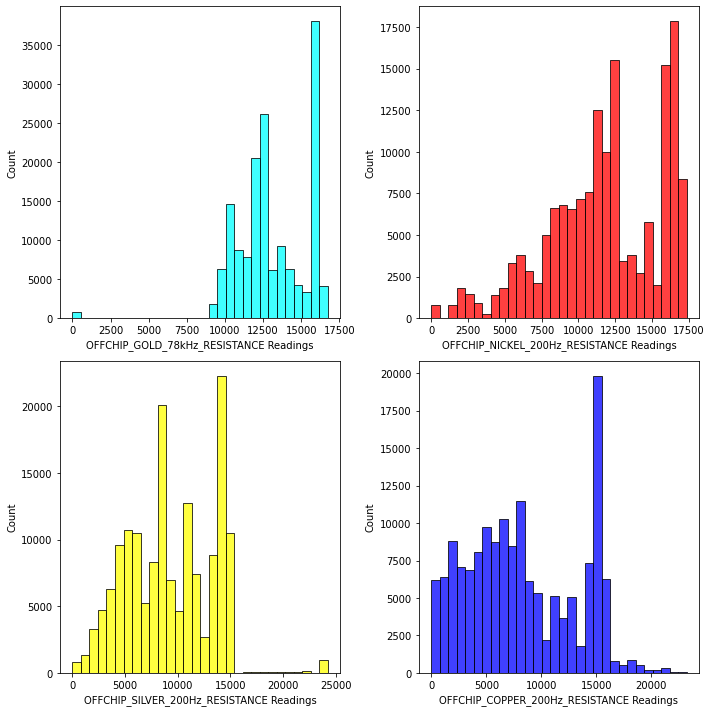

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

grp1 = sns.histplot(data=df.OFFCHIP_GOLD_78kHz_RESISTANCE, bins=30, color='cyan', ax=axes[0][0])
grp1.set(xlabel="OFFCHIP_GOLD_78kHz_RESISTANCE Readings")

grp2 = sns.histplot(data=df.OFFCHIP_NICKEL_200Hz_RESISTANCE, bins=30, color='r', ax=axes[0][1])
grp2.set(xlabel="OFFCHIP_NICKEL_200Hz_RESISTANCE Readings")

grp3 = sns.histplot(data=df.OFFCHIP_SILVER_200Hz_RESISTANCE, bins=30, color='yellow', ax=axes[1][0])
grp3.set(xlabel="OFFCHIP_SILVER_200Hz_RESISTANCE Readings")

grp4 = sns.histplot(data=df.OFFCHIP_COPPER_200Hz_RESISTANCE, bins=30, color='b', ax=axes[1][1])
grp4.set(xlabel="OFFCHIP_COPPER_200Hz_RESISTANCE Readings")

plt.tight_layout()

### Readings of Gold 78Khz IDE

According to Correlation Matrix, this features is most correlated so we are going to explore it.<br>
Here, how the readings of this sensor/feature is varying for all the classes are plotted.

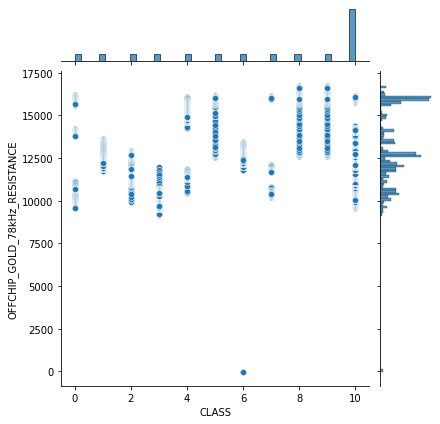

In [27]:
# sns.pairplot(df, hue='CLASS')
sns.jointplot(data=df, x="CLASS", y=df.OFFCHIP_GOLD_78kHz_RESISTANCE, kind='scatter')

## Preparing dataset for training and testing

In [14]:
# spiltting data into training and testing in (80/20 ratio)

x_train, x_test, y_train, y_test = train_test_split(df.drop('CLASS', axis=1), df['CLASS'], test_size=0.2, random_state=42)

## Model Building

### Random Forest Classifier

In [15]:
# Create a random forest classifier

rfc = RandomForestClassifier()

In [16]:
# Training the model using the training data
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
# Training Accuracy
rfc.score(x_train, y_train)

0.9590672348484849

In [18]:
# Predicting the model accuracy
rfc_pred = rfc.predict(x_test)

### Feature Importance Plot

Visualize the importance of each feature in the Random Forest model.

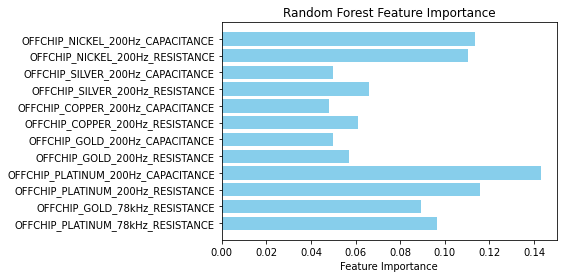

In [36]:
feature_importance = rfc.feature_importances_
features = df.columns[:-1]

plt.figure()
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

## Model Evaluation

### Confusion Matrix Heatmap For Random Forest

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

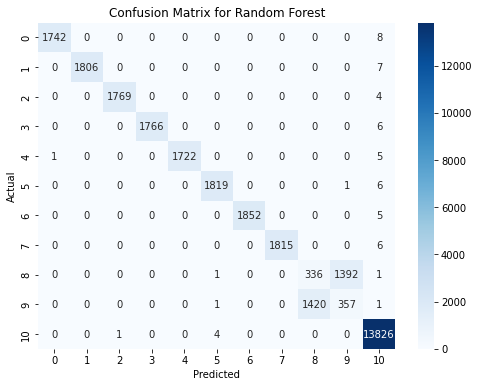

In [39]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')

### Graphical representation of Predicted Values's Count

Text(0, 0.5, 'Count')

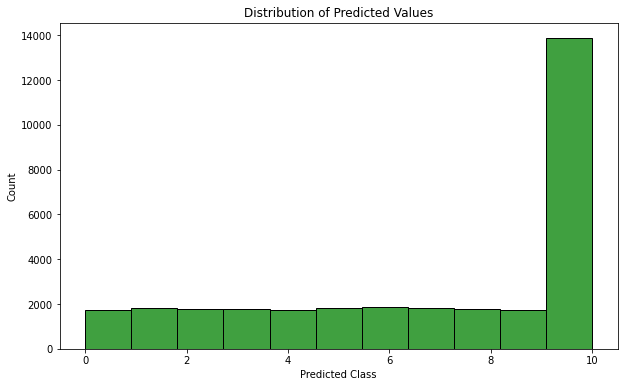

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(rfc_pred, bins=11, kde=False, color='green')
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Class')
plt.ylabel('Count')

### Classification Report

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1813
           2       1.00      1.00      1.00      1773
           3       1.00      1.00      1.00      1772
           4       1.00      1.00      1.00      1728
           5       1.00      1.00      1.00      1826
           6       1.00      1.00      1.00      1857
           7       1.00      1.00      1.00      1821
           8       0.19      0.19      0.19      1730
           9       0.20      0.20      0.20      1779
          10       1.00      1.00      1.00     13831

    accuracy                           0.91     31680
   macro avg       0.85      0.85      0.85     31680
weighted avg       0.91      0.91      0.91     31680



### R2 Score, Mean Squarred Error, Mean Absolute Error

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Random Forest Classifier
print("Random Forest Classifier")
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('\n')

Random Forest Classifier
R2 score:  0.9857936906917213
Mean Squared Error:  0.17105429292929292
Mean Absolute Error:  0.10015782828282828




## Conclusion

### For Random Forest Classifier - Analysis

From the metrics provided:

For most of the classes (0 to 10), precision, recall, and F1-score are very high (close to 1.00), indicating that the model is performing exceptionally well for those classes.

For class 8 and class 9, precision, recall, and F1-score are relatively lower, suggesting that the model's performance is weaker for these classes.

**The accuracy of the model is around 91%**, which is the proportion of correctly classified instances overall.

The macro average and weighted average give you a sense of the overall model performance considering all classes. Macro average is around 0.85, which indicates a good overall performance across classes.

In summary, your model seems to be performing well for most classes, but there might be room for improvement for classes 8 and 9. Consider looking into ways to balance your class distribution and possibly fine-tuning your model to improve its performance for these classes.

#### R2 Score (Coefficient of Determination):

R2 score ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable.
An R2 score of 0.9859 suggests that your model explains approximately 98.59% of the variance in the target variable compared to a simple mean-based model.
Mean Squared Error (MSE):

#### Mean Squared Error (MSE):

MSEmeasures the average squared difference between predicted values and actual values.
A smaller MSE value indicates that the model's predictions are closer to the actual values.
In your case, an MSE of 0.1699 means that, on average, the squared difference between the model's predictions and the actual values is 0.1699.

#### Mean Absolute Error (MAE):

MAE measures the average absolute difference between predicted values and actual values.
Similar to MSE, a smaller MAE value indicates that the model's predictions are closer to the actual values.
An MAE of 0.1001 means that, on average, the absolute difference between the model's predictions and the actual values is 0.1001.
Since these metrics are typically used for regression tasks, they might not give you a complete picture of how well your Random Forest classifier is performing for a multi-class classification problem.

# 

## Want to try web app of this model ?
<a href="https://huggingface.co/spaces/abanand132/aqua-alert" target="_blank"> <img src="https://www.transparentpng.com/thumb/click-here-button/VbnO5J-click-here-button-free-transparent-png.png" width=150px alt="click here"> </a>